In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
student=pd.read_csv('http://bit.ly/w-data')

In [ ]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
student.info() #there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


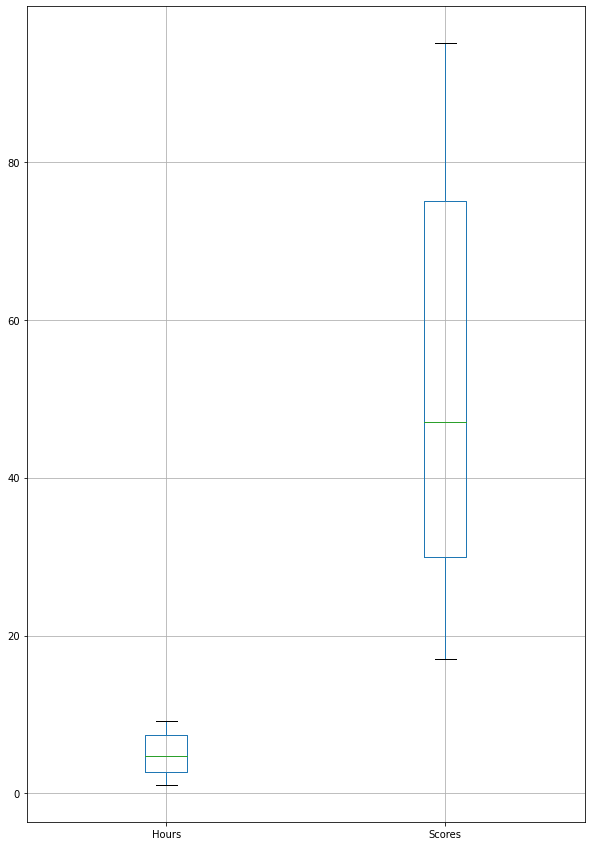

In [ ]:
#check for outliers if any using boxplot
import matplotlib.pyplot as plt
student.boxplot(figsize=(10,15))
plt.show()
#there are no outliers

In [ ]:
#check for correlation
student.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


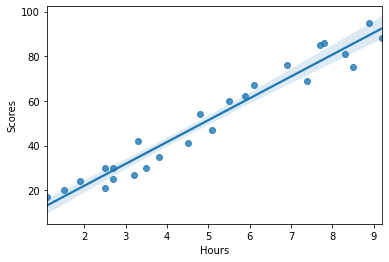

In [ ]:
#scatter plot of "hours" and "scores"
sns.regplot(x="Hours", y="Scores", data=student)

From this scatter plot, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [ ]:
x = student.iloc[:, :-1].values
y = student.iloc[:, 1].values

print("Input for my ML model: \n",x)
print("Output for my ML model : \n", y)

Input for my ML model: 
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Output for my ML model : 
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(x,y,test_size=0.2,random_state=8)

In [ ]:
#call the model
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()

In [ ]:
#Fit the model
clf = lr_model.fit(X_train.reshape(-1,1), Y_train)

In [ ]:
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X_test)
print(y_predicted)

[62.40921319 14.53174465 37.51292955 40.38557766 27.93743584]


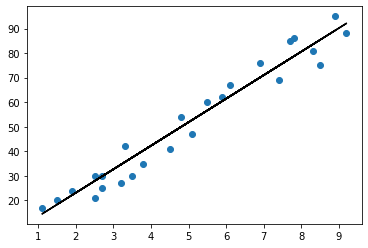

In [25]:

# Plotting the regression line
line = lr_model.coef_*x+lr_model.intercept_

# Plotting for the test data
plt.scatter (x,y)
plt.plot (x, line, color = 'Black')
plt.show()

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': [Y_test], 'Predicted': [y_predicted]})  
df 

,Actual,Predicted
0,"[67, 17, 30, 35, 21]","[62.40921319045163, 14.531744647008953, 37.512..."


In [ ]:
# You can also test with your own data
hours = 9.25
own_pred = clf.predict(x)
print("No of Hours = {}".format(x))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Predicted Score = 27.937435839172906


In [31]:

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_predicted)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_predicted))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_predicted))) 

Mean Absolute Error: 5.378997042008352
Mean Squared Error: 32.14883623379889
Root mean squared Error: 5.669994376875421
